# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

%matplotlib inline

In [2]:
train_o = pd.read_csv('train.csv', index_col='Id', keep_default_na = False)
test_o = pd.read_csv('test.csv', index_col='Id', keep_default_na = False)

train_o.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Check for duplicates

In [3]:
print(train_o.duplicated().sum())
print(test_o.duplicated().sum())

0
0


### Look through all categorical features

In [4]:
for column in train_o.columns:
    if train_o[column].dtype == 'object':
        print(column)
        print(np.unique(train_o[column], return_counts = True))
        print('-'*50)

MSZoning
(array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object), array([  10,   65,   16, 1151,  218], dtype=int64))
--------------------------------------------------
LotFrontage
(array(['100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '114', '115', '116', '118', '120',
       '121', '122', '124', '128', '129', '130', '134', '137', '138',
       '140', '141', '144', '149', '150', '152', '153', '160', '168',
       '174', '182', '21', '24', '30', '313', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
       '91', '92', '93', '94', '95', '96', '97', '98', '99', 'NA'],
      dtype=object), array([ 16, 

In [5]:
for column in test_o.columns:
    if test_o[column].dtype == 'object':
        print(column)
        print(np.unique(test_o[column], return_counts = True))
        print('-'*50)

MSZoning
(array(['C (all)', 'FV', 'NA', 'RH', 'RL', 'RM'], dtype=object), array([  15,   74,    4,   10, 1114,  242], dtype=int64))
--------------------------------------------------
LotFrontage
(array(['100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '112', '113', '114', '115', '117', '118', '119',
       '120', '121', '123', '124', '125', '126', '128', '129', '130',
       '131', '133', '134', '135', '136', '140', '149', '150', '155',
       '160', '195', '200', '21', '22', '24', '25', '26', '28', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98

Modify copies of the datasets

In [6]:
train_m = train_o.copy()
test_m = test_o.copy()

### Fix column data type and resolve NAs

In [7]:
# MSSubClass shouldn't be numerical
train_m.MSSubClass = train_m.MSSubClass.astype('str')
test_m.MSSubClass = test_m.MSSubClass.astype('str')
train_m.MSSubClass = train_m.MSSubClass.astype('category')
test_m.MSSubClass = test_m.MSSubClass.astype('category')

# Convert LotFrontage column to numerical
train_m.loc[train_m['LotFrontage'] == 'NA', ['LotFrontage']] = np.nan
test_m.loc[test_m['LotFrontage'] == 'NA', ['LotFrontage']] = np.nan

train_m.LotFrontage = train_m.LotFrontage.astype('float')
test_m.LotFrontage = test_m.LotFrontage.astype('float')

# Test set has 2 NAs in Utilities. Allpub is by far the most common so impute those as that.
test_m.loc[test_m['Utilities'] == 'NA', ['Utilities']] = 'AllPub'

# Change NAs in GarageYrBlt to YearBuilt and convert column to numerical
train_m.loc[train_m.GarageYrBlt == 'NA',['GarageYrBlt']] = train_m.YearBuilt.astype('str')
test_m.loc[test_m.GarageYrBlt == 'NA',['GarageYrBlt']] = test_m.YearBuilt.astype('str')

train_m.GarageYrBlt = train_m.GarageYrBlt.astype('int64')
test_m.GarageYrBlt = test_m.GarageYrBlt.astype('int64')

# Test set has one entry with Exterior1st Exterior2nd as NAs. Impute with most common VinylSd for both
test_m.loc[[2152], ['Exterior1st', 'Exterior2nd']] = 'VinylSd'

# A few MasVnrType and MasVnrArea NAs. For cases where NAs are for both, impute with None and 0. For one entry with area, impute type as BrkFace since most common.
train_m.loc[train_m['MasVnrArea'] == 'NA', ['MasVnrType', 'MasVnrArea']] = ['None', '0']
test_m.loc[test_m['MasVnrArea'] == 'NA', ['MasVnrType', 'MasVnrArea']] = ['None', '0']
test_m.loc[[2611], ['MasVnrType']] = 'BrkFace'

# Convert MasVnrArea to numerical
train_m.MasVnrArea = train_m.MasVnrArea.astype('int64')
test_m.MasVnrArea = test_m.MasVnrArea.astype('int64')

# Test set has some entries with no basement but values aren't 0
test_m.loc[[2121], ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = '0'
test_m.loc[[2189], ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = '0'

test_m[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = test_m[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].astype('int64')

# Test set has two NAs in Functional, impute as Typ
test_m.loc[test_m['Functional'] == 'NA', ['Functional']] = 'Typ'

# Test set has one NA for KitchenQual, impute as TA
test_m.loc[test_m['KitchenQual'] == 'NA', ['KitchenQual']] = 'TA'

# Test set has one entry with GarageCars and GarageArea as NA
test_m.loc[[2577], ['GarageCars', 'GarageArea']] = '0'
test_m.loc[[2577], ['GarageType']] = 'NA'

test_m[['GarageCars','GarageArea']] = test_m[['GarageCars','GarageArea']].astype('int64')

#### LotFrontage

LotFrontage has a lot of missing data and imputing isn't necessarily that trivial.

Logically speaking, should be relatively highly correlated to LotArea. Study scatter plot to see if this is indeed the case.

Only look at units with LotArea <= 20000 to avoid outliers and only LotShapes of Reg and IR1 since most units are those two.

In [8]:
LF_df_train = train_m[['LotFrontage', 'LotArea', 'LotShape']].loc[(train_m['LotFrontage'] != 'NA') & (train_m['LotShape'].isin(['Reg', 'IR1'])) & (train_m['LotArea'] <= 20000)].dropna()
LF_df_test = test_m[['LotFrontage', 'LotArea', 'LotShape']].loc[(test_m['LotFrontage'] != 'NA') & (test_m['LotShape'].isin(['Reg', 'IR1'])) & (test_m['LotArea'] <= 20000)].dropna()

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

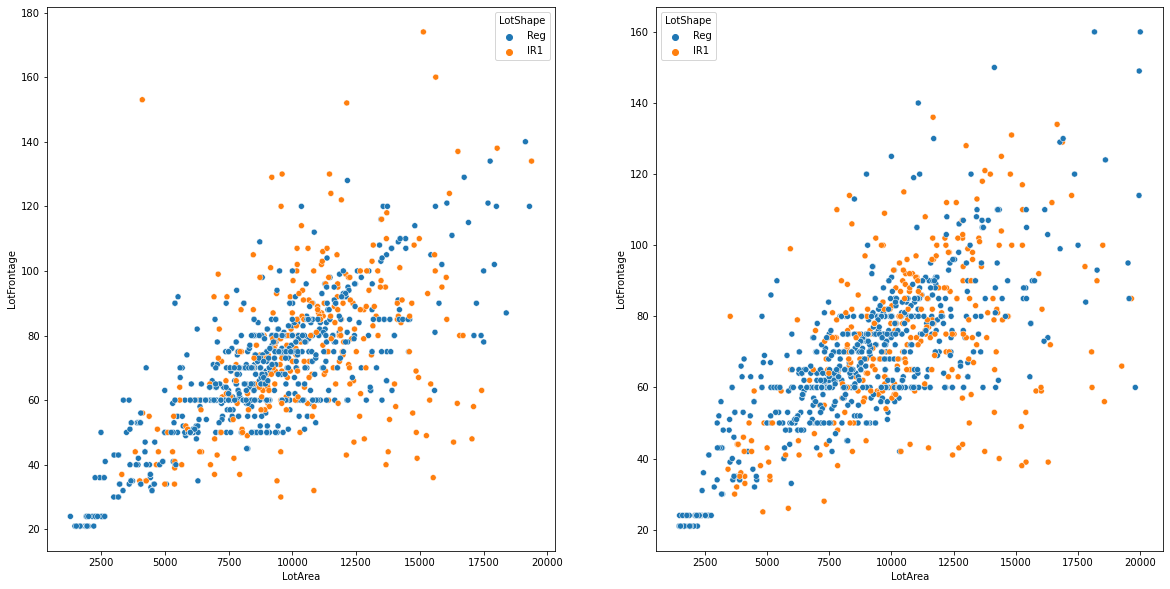

In [9]:
f, axes = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(y = LF_df_train['LotFrontage'].astype('int64'), x = LF_df_train["LotArea"], data = LF_df_train, hue="LotShape", ax=axes[0])
sns.scatterplot(y = LF_df_test['LotFrontage'].astype('int64'), x = LF_df_test["LotArea"], data = LF_df_test, hue="LotShape", ax=axes[1])

For LotShape = Reg, the relationship appears to be fairly linear. IR1 is much more random.

Will do regression on all LotShape = Reg entries and impute missing with predicted value. This will introduce multicollinearity issues but will deal with it later.

In [10]:
from sklearn.linear_model import LinearRegression

df = pd.concat([train_m.loc[train_m['LotShape'] == 'Reg', ['LotFrontage', 'LotArea']], test_m.loc[test_m['LotShape'] == 'Reg', ['LotFrontage', 'LotArea']]])
df = df.dropna()

lm = LinearRegression()

lm.fit(df[['LotArea']], df['LotFrontage'])

train_m.loc[train_m['LotFrontage'].isna(), ['LotFrontage']] = lm.predict(train_m.loc[train_m['LotFrontage'].isna(), ['LotArea']])
test_m.loc[test_m['LotFrontage'].isna(), ['LotFrontage']] = lm.predict(test_m.loc[test_m['LotFrontage'].isna(), ['LotArea']])

### Some Feature Engineering

Some of the features can be transformed to be more logical or can be combined with others to reduce dimensionality.

#### Bathrooms

For simplicity sake, will just consider half bathrooms to be 0.5 bathrooms and add to full bathrooms.

In [11]:
train_m['BsmtBath'] = train_m['BsmtFullBath']+train_m['BsmtHalfBath']*0.5
test_m['BsmtBath'] = test_m['BsmtFullBath']+test_m['BsmtHalfBath']*0.5
train_m = train_m.drop(['BsmtFullBath', 'BsmtHalfBath'], axis = 1)
test_m = test_m.drop(['BsmtFullBath', 'BsmtHalfBath'], axis = 1)

train_m['Bath'] = train_m['FullBath']+train_m['HalfBath']*0.5
test_m['Bath'] = test_m['FullBath']+test_m['HalfBath']*0.5
train_m = train_m.drop(['FullBath', 'HalfBath'], axis = 1)
test_m = test_m.drop(['FullBath', 'HalfBath'], axis = 1)

#### YearRemodAdd

Just simplify to whether property was remodeled or not.

In [12]:
train_m['Remod'] = np.where(train_m['YearRemodAdd'] == train_m['YearBuilt'], 0, 1)
test_m['Remod'] = np.where(test_m['YearRemodAdd'] == test_m['YearBuilt'], 0, 1)

train_m = train_m.drop(['YearRemodAdd'], axis = 1)
test_m = test_m.drop(['YearRemodAdd'], axis = 1)

#### YearBuilt and YrSold

YearBuilt and YrSold makes more sense if converted to age of property when sold.

Convert YrSold to categorical since the factor being evaluated is really the economy and real estate market during the year. Perhaps could argue reduction in purchasing power reduces year to year due to inflation but cannot claim it's a certainty nor that the degree is consistent.

In [13]:
train_m['AgeSold'] = train_m['YrSold']-train_m['YearBuilt']
test_m['AgeSold'] = test_m['YrSold']-test_m['YearBuilt']

train_m['YrSold'] = train_m['YrSold'].astype('str')
test_m['YrSold'] = test_m['YrSold'].astype('str')
train_m['YrSold'] = train_m['YrSold'].astype('category')
test_m['YrSold'] = test_m['YrSold'].astype('category')

train_m = train_m.drop(['YearBuilt'], axis = 1)
test_m = test_m.drop(['YearBuilt'], axis = 1)

#### MoSold

MoSold should be categorical. Reduce to quarters of the year to reduce dimensionality.

In [14]:
train_m['QtrSold'] = train_m['MoSold'].replace([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], [1, 2, 3, 4])
test_m['QtrSold'] = test_m['MoSold'].replace([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], [1, 2, 3, 4])

train_m['QtrSold'] = train_m['QtrSold'].astype('str')
test_m['QtrSold'] = test_m['QtrSold'].astype('str')
train_m['QtrSold'] = train_m['QtrSold'].astype('category')
test_m['QtrSold'] = test_m['QtrSold'].astype('category')

train_m = train_m.drop(['MoSold'], axis = 1)
test_m = test_m.drop(['MoSold'], axis = 1)

#### GrLivArea & TotalBsmtSF

GrLivArea is redundant since it is the sum of 1stFlrSF, 2ndFlrSF and LowQualFinSF.


TotalBsmtSF is redundant since it is the sum of BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF.


<AxesSubplot:xlabel='TotalBsmtSF'>

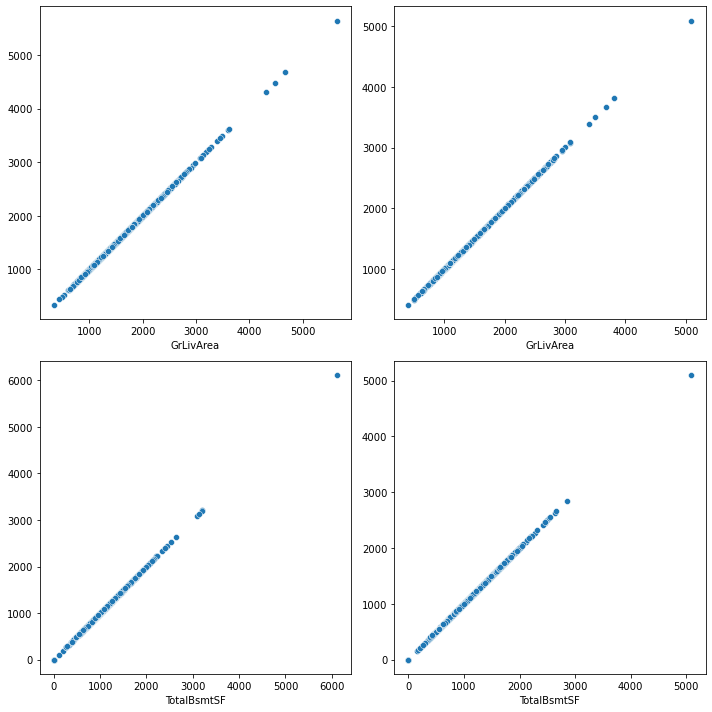

In [15]:
f, axes = plt.subplots(2, 2, figsize=(10,10))
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(y = train_m['1stFlrSF']+train_m['2ndFlrSF']+train_m['LowQualFinSF'], x = train_m['GrLivArea'], ax=axes[0, 0])
sns.scatterplot(y = test_m['1stFlrSF']+test_m['2ndFlrSF']+test_m['LowQualFinSF'], x = test_m['GrLivArea'], ax=axes[0, 1])

sns.scatterplot(y = train_m['BsmtFinSF1']+train_m['BsmtFinSF2']+train_m['BsmtUnfSF'], x = train_m['TotalBsmtSF'], ax=axes[1, 0])
sns.scatterplot(y = test_m['BsmtFinSF1']+test_m['BsmtFinSF2']+test_m['BsmtUnfSF'], x = test_m['TotalBsmtSF'], ax=axes[1, 1])

In [16]:
train_m = train_m.drop(['GrLivArea', 'TotalBsmtSF'], axis = 1)
test_m = test_m.drop(['GrLivArea', 'TotalBsmtSF'], axis = 1)

#### TotRmsAbvGrd

Convert to number of non-bedroom or kitchen rooms.

In [17]:
train_m['OtherRms'] = train_m['TotRmsAbvGrd']-(train_m['BedroomAbvGr']+train_m['KitchenAbvGr'])
test_m['OtherRms'] = test_m['TotRmsAbvGrd']-(test_m['BedroomAbvGr']+test_m['KitchenAbvGr'])

train_m = train_m.drop(['TotRmsAbvGrd'], axis = 1)
test_m = test_m.drop(['TotRmsAbvGrd'], axis = 1)

## Export Fixed Data

In [18]:
train_m.to_excel('train_fixed.xlsx')
test_m.to_excel('test_fixed.xlsx')

# Linear Regression / Regularized Linear Regression

## Data Exploration

### Multicollinearity

Multicollinearity results in coefficients with higher standard errors and causes the model to become unstable. Therefore, need to check for and resolve multicollinearity issues between features.

Plot correlation matrix and see if some highly correlated features can/should be removed.

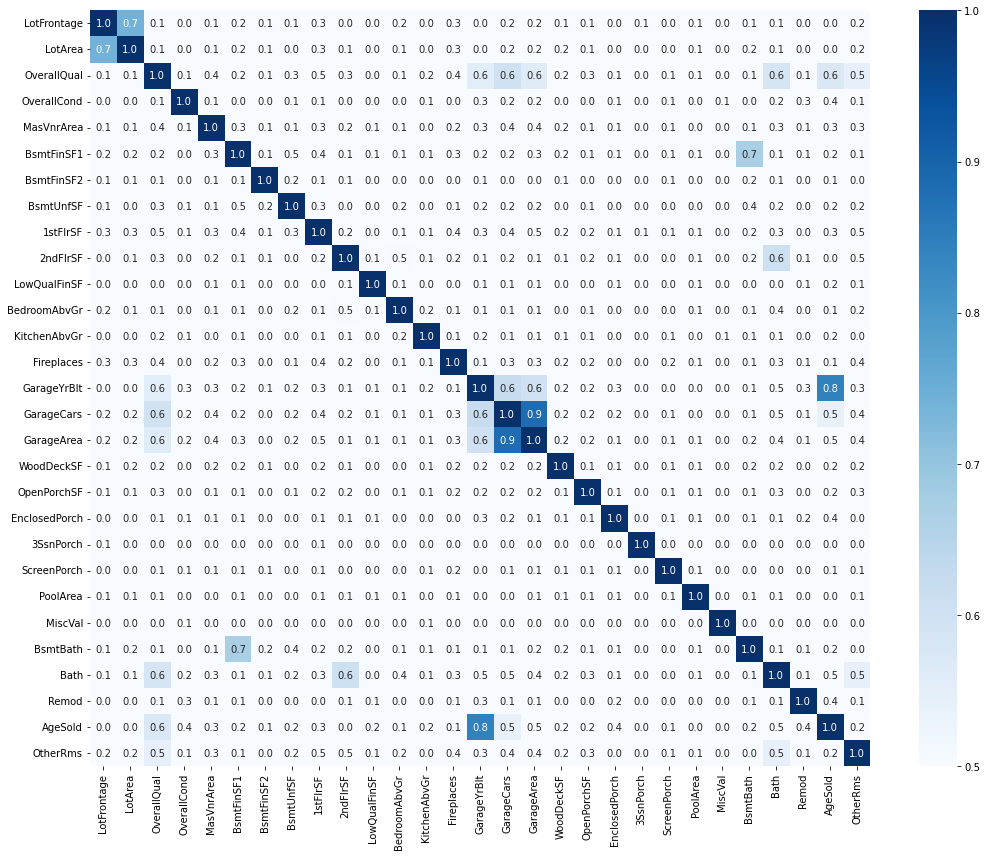

In [19]:
from pandas.plotting import scatter_matrix

corrMatrix = train_m.drop('SalePrice', axis = 1).corr().abs()

plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True, vmin=0.5, fmt='.1f', cmap='Blues')

plt.show()

Make a table showing feature pairs that have correlation values > 0.7. Also make table showing correlation of each 

In [20]:
corr_df = pd.DataFrame(corrMatrix.unstack(), columns = ['Correlation'])
corr_df[(corr_df > 0.7) & (corr_df != 1)].dropna().drop_duplicates()

,,Correlation
LotFrontage,LotArea,0.740549
GarageYrBlt,AgeSold,0.844254
GarageCars,GarageArea,0.882475


In [21]:
target_corr = train_m.corr().abs()[['SalePrice']].sort_values('SalePrice', ascending = False)
target_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GarageCars,0.640409
OtherRms,0.631425
GarageArea,0.623431
1stFlrSF,0.605852
Bath,0.597966
AgeSold,0.523350
GarageYrBlt,0.508043
MasVnrArea,0.472614


As shown, few feature pairs are highly correlated.

- LotFrontage & LotArea. This is expected, especially given that LotFrontage NA's were imputed with linear regression with LotArea as the independent variable. Will remove LotFrontage due to many NAs as well as LotArea logically being more important with higher correlation to target variable.


- GarageYrBlt & AgeSold. This is expected since for a vast majority of houses the year built will be the same. Will remove GarageYrBlt since AgeSold is logically more important with higher correlation to target variable.


- GarageCars & GarageArea. This is expected since garage size in car capacity is directly indicative of the garage area. Will remove GarageArea	since GarageCars has higher correlation to target variable.

In [22]:
train_mm = train_m.drop(['LotFrontage', 'GarageYrBlt', 'GarageArea'], axis = 1)
test_mm = test_m.drop(['LotFrontage', 'GarageYrBlt', 'GarageArea'], axis = 1)

### Normality

The assumption that residuals are normally distributed can be violated due to presence of outliers as well as non-normally distributed variables.

#### SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

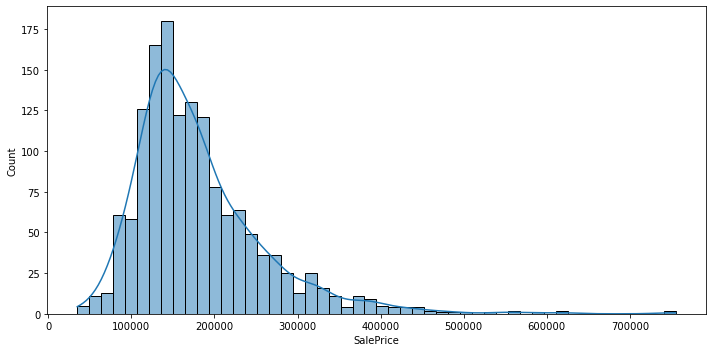

In [23]:
f, axes = plt.subplots(figsize=(10,5))
sns.histplot(train_mm['SalePrice'], kde=True, bins=50)

SalesPrice is clearly skewed and not normally distributed. Apply log transformation.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

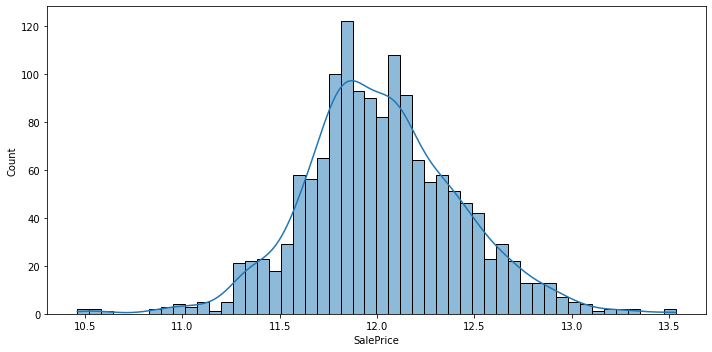

In [24]:
train_mm['SalePrice'] = np.log(train_mm['SalePrice'])

f, axes = plt.subplots(figsize=(10,5))
sns.histplot(train_mm['SalePrice'], kde=True, bins=50)

#### 1stFlrSF

Features technically do not need to be normally distributed, but the residuals should be. Will check after running model if assumption is satisfied and transform features to be more normally distributed if necessary.

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

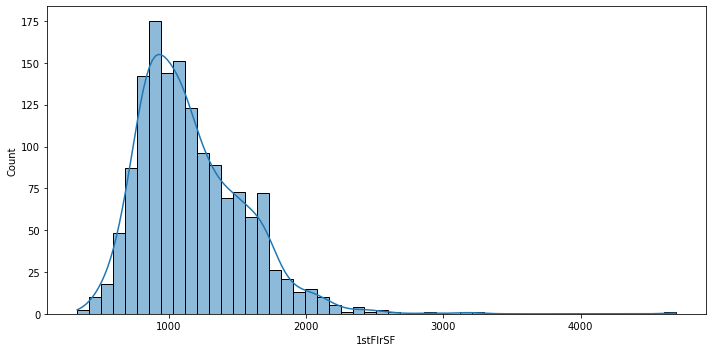

In [25]:
f, axes = plt.subplots(figsize=(10,5))
sns.histplot(train_mm['1stFlrSF'], kde=True, bins=50)

In [26]:
# train_m['1stFlrSF'] = np.log(train_m['1stFlrSF'])

# f, axes = plt.subplots(figsize=(10,5))
# sns.histplot(train_m['1stFlrSF'], kde=True, bins=50)

#### Check for outliers

Check for outliers with the top 5 features with highest correlation to sale price.

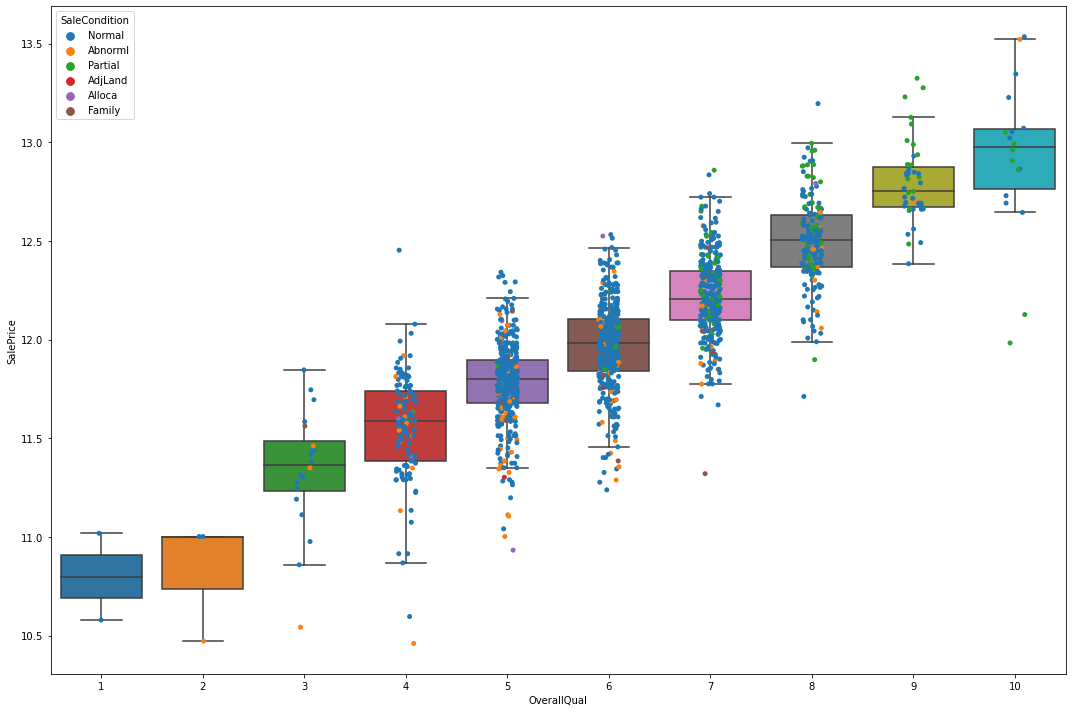

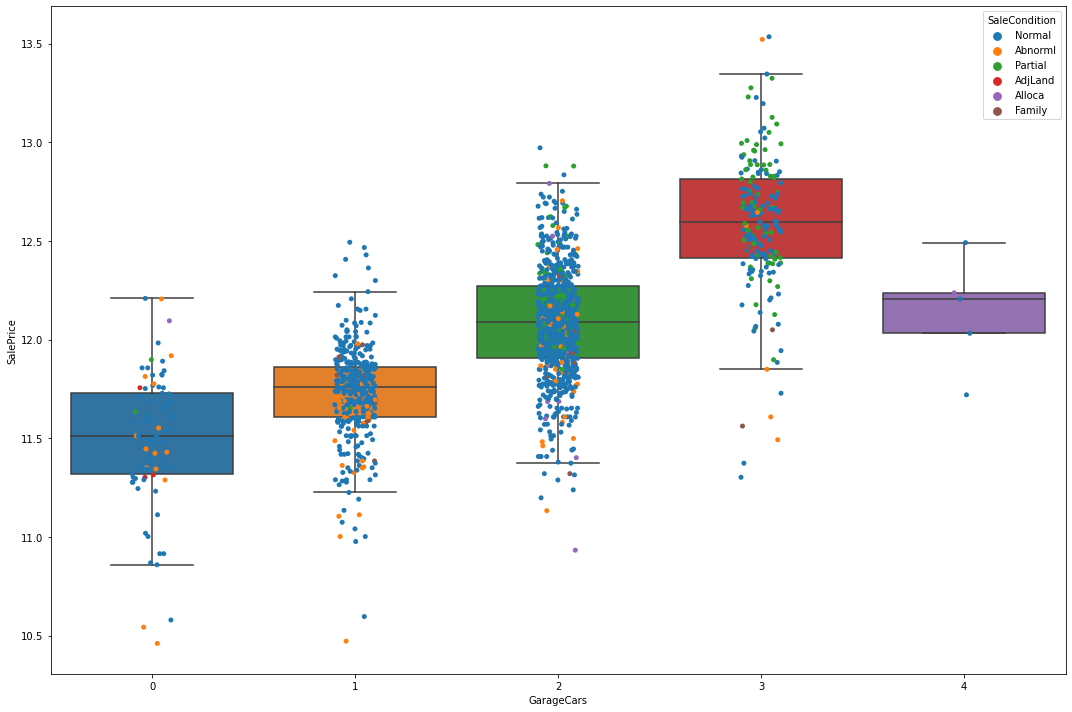

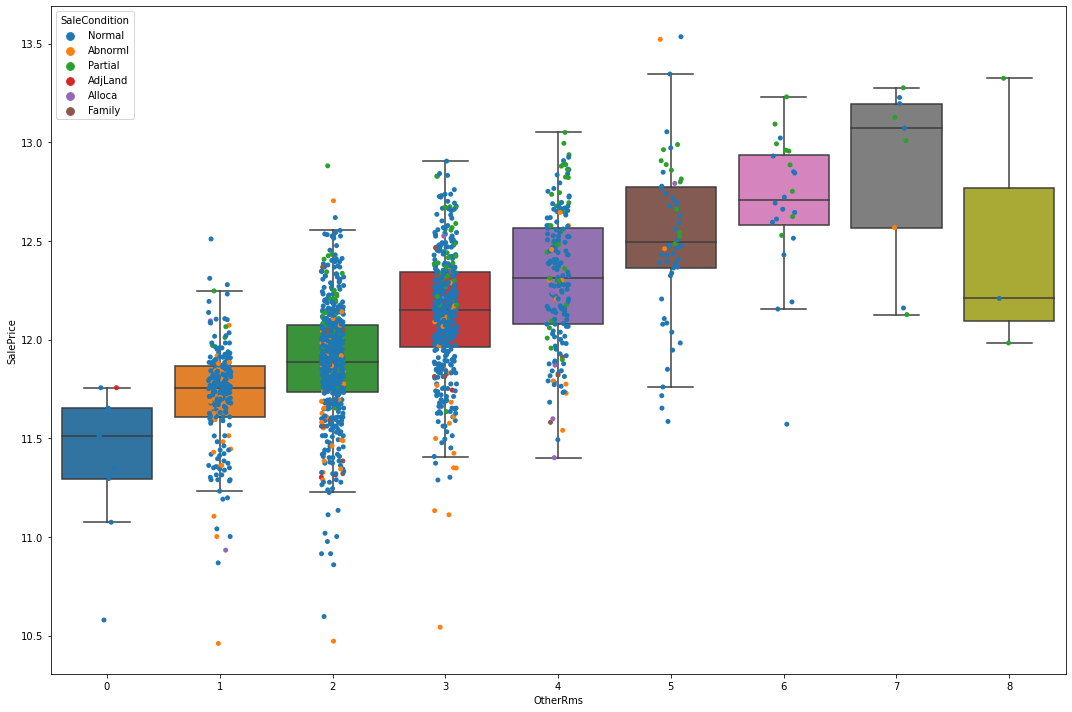

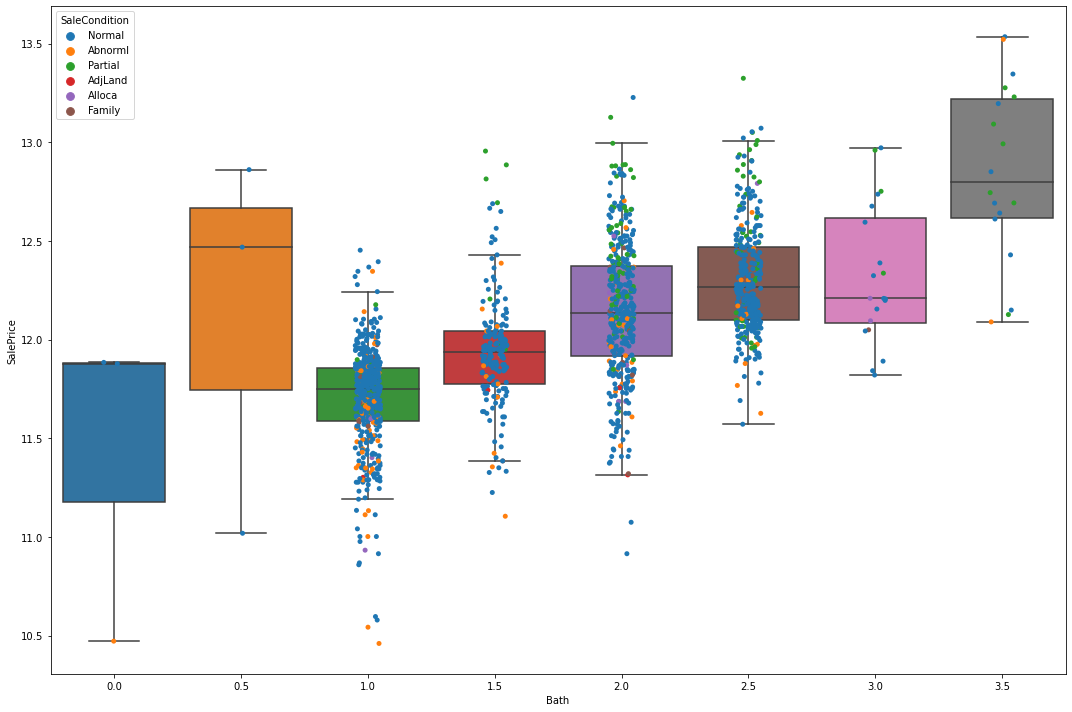

In [27]:
topordfeats = ['OverallQual', 'GarageCars', 'OtherRms', 'Bath']

for i, feat in enumerate(topordfeats):
    f, axes = plt.subplots(figsize=(15,10))
    sns.boxplot(y = 'SalePrice', x = feat, data = train_mm, showfliers = False)
    sns.stripplot(y = 'SalePrice', x = feat, data = train_mm, hue='SaleCondition')

As shown especially as a function of OverallQual, there are a few outliers that have non-normal SaleCondition that probably should be removed. Create a copy of data with outliers removed (original can be modeled for comparison). For each of the 4 top ordinal features, remove data points below 0.5 percentile and above 99.5 percentile.\
*Note: Doing so can remove enough points such that certain feature values don't have any entries, such as OverallQual of 1 or 2. Can implement method where if group has less than a certain count then do not remove outliers but will just go with this method for now.

In [28]:
def not_outlier(s):
    lower_limit = s.quantile(0.001)
    upper_limit = s.quantile(0.999)
    return s.between(lower_limit, upper_limit)

In [29]:
train_nooutlier = train_mm.copy()
for feat in topordfeats:  
    train_nooutlier = train_nooutlier[train_nooutlier.groupby(feat)['SalePrice'].apply(not_outlier)]

In [30]:
# # Use this if do not want to remove outliers if data points in group is <3.

# for feat in topordfeats:
#     filtered_out = train_m.groupby(feat).filter(lambda x: x['SalePrice'].count() <= 3)
    
#     filtered = train_m.groupby(feat).filter(lambda x: x['SalePrice'].count() > 3)
#     train_nooutlier = filtered[filtered.groupby(feat)['SalePrice'].apply(not_outlier)]
#     train_m = pd.concat([train_nooutlier, filtered_out], axis = 0)

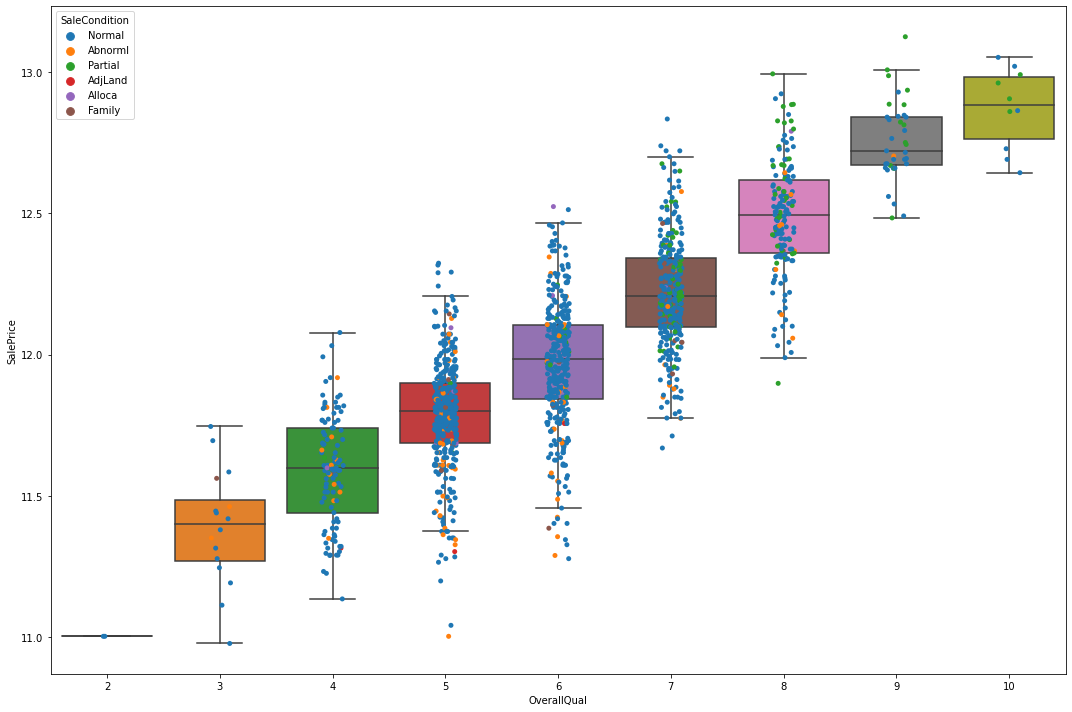

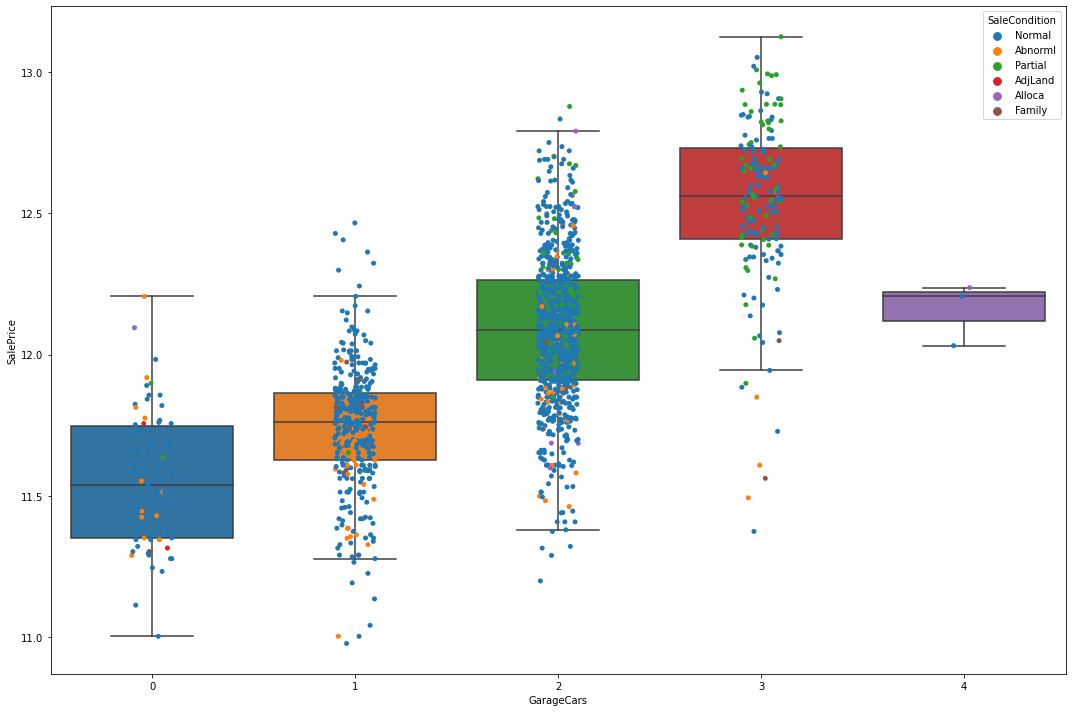

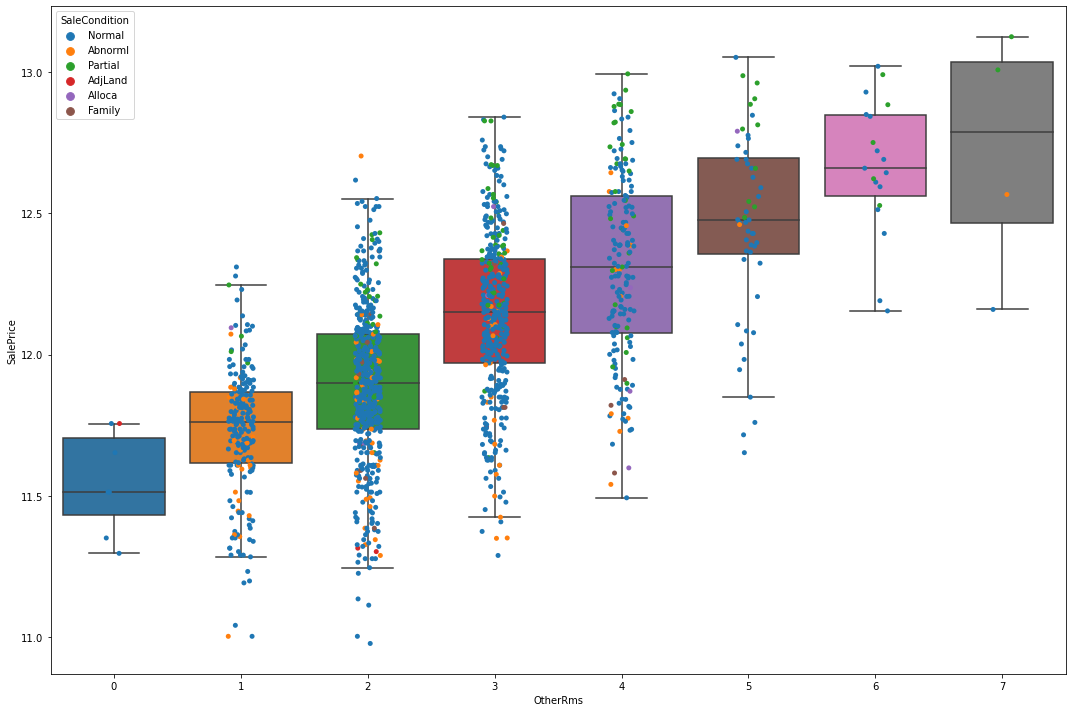

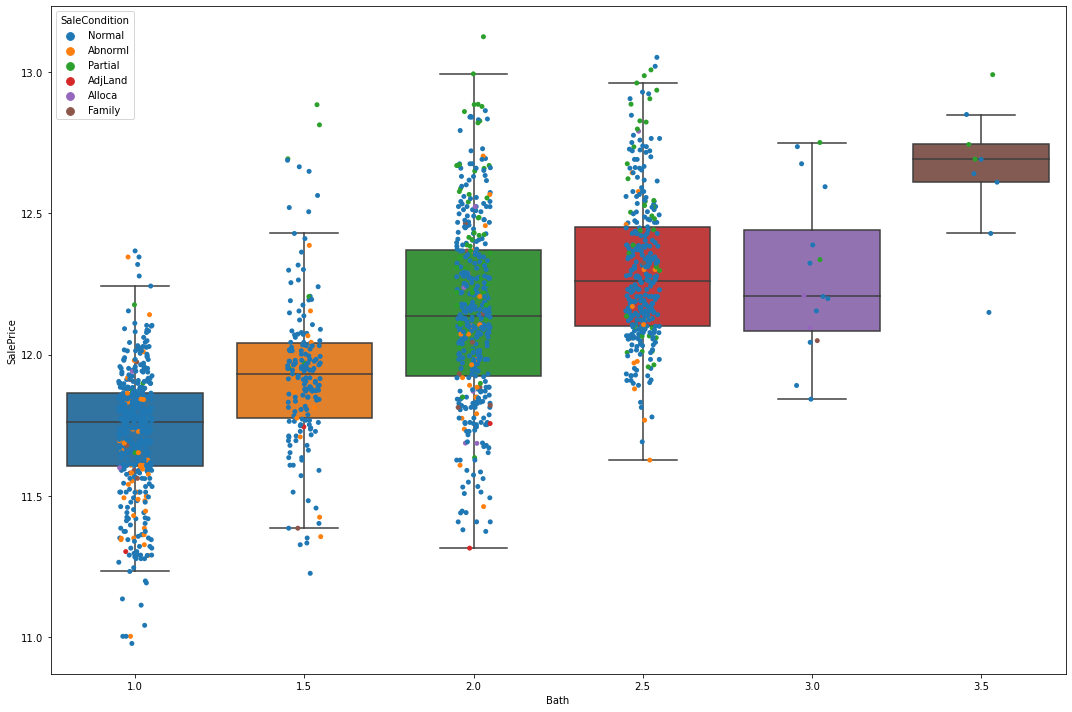

In [31]:
for i, feat in enumerate(topordfeats):
    f, axes = plt.subplots(figsize=(15,10))
    sns.boxplot(y = 'SalePrice', x = feat, data = train_nooutlier, showfliers = False)
    sns.stripplot(y = 'SalePrice', x = feat, data = train_nooutlier, hue='SaleCondition')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

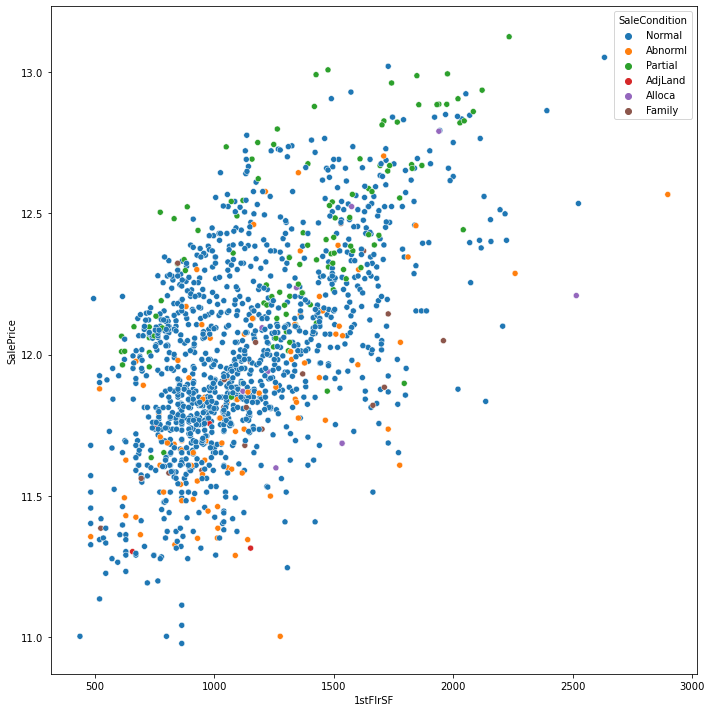

In [32]:
# 1stFlrSF
f, axes = plt.subplots(figsize=(10,10))
sns.scatterplot(y = 'SalePrice', x = '1stFlrSF', data = train_nooutlier, hue='SaleCondition')

Looks okay, will not remove any more data points.

## Encode Ordinal Features

In [33]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

ord_fea = ['LotShape', 
           'Utilities', 
           'LandSlope', 
           'ExterQual', 
           'ExterCond', 
           'BsmtQual', 
           'BsmtCond', 
           'BsmtExposure', 
           'BsmtFinType1', 
           'BsmtFinType2', 
           'HeatingQC', 
           'KitchenQual', 
           'Functional', 
           'FireplaceQu', 
           'GarageFinish', 
           'GarageQual', 
           'GarageCond', 
           'PavedDrive', 
           'PoolQC', 
           'Fence']

ord_fea_cat = [None]*len(ord_fea)

ord_fea_cat[0] = ['IR3', 'IR2', 'IR1', 'Reg']
ord_fea_cat[1] = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
ord_fea_cat[2] = ['Sev', 'Mod', 'Gtl']
ord_fea_cat[3] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[4] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[5] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[6] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[7] = ['NA', 'No', 'Mn', 'Av', 'Gd']
ord_fea_cat[8] = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_fea_cat[9] = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_fea_cat[10] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[11] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[12] = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
ord_fea_cat[13] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[14] = ['NA', 'Unf', 'RFn', 'Fin']
ord_fea_cat[15] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[16] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[17] = ['N', 'P', 'Y']
ord_fea_cat[18] = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[19] = ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

ord_enc = OrdinalEncoder(categories=ord_fea_cat)

transformer = make_column_transformer((ord_enc, ord_fea))

transformed_train = transformer.fit_transform(train_mm)
transformed_train_nooutlier = transformer.fit_transform(train_nooutlier)
transformed_test = transformer.fit_transform(test_mm)

In [34]:
transformed_train_df = pd.DataFrame(transformed_train).set_index(train_mm.index)
transformed_train_nooutlier_df = pd.DataFrame(transformed_train_nooutlier).set_index(train_nooutlier.index)
transformed_test_df = pd.DataFrame(transformed_test).set_index(test_mm.index)

transformed_train_df.columns = ord_fea
transformed_train_nooutlier_df.columns = ord_fea
transformed_test_df.columns = ord_fea

In [35]:
train_mm = pd.concat([train_mm.loc[:, ~train_mm.columns.isin(ord_fea)], transformed_train_df], axis = 1)
train_nooutlier_mm = pd.concat([train_nooutlier.loc[:, ~train_nooutlier.columns.isin(ord_fea)], transformed_train_nooutlier_df], axis = 1)
test_mm = pd.concat([test_mm.loc[:, ~test_mm.columns.isin(ord_fea)], transformed_test_df], axis = 1)

## OneHotEncoder for Categorical Features

In [36]:
cat_feat = train_mm.select_dtypes(['object', 'category']).columns.tolist()

transformer = make_column_transformer((OneHotEncoder(drop='first'), cat_feat), remainder='passthrough')

transformed_train = transformer.fit_transform(train_mm)
transformed_train_df = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())

transformed_train_nooutlier = transformer.fit_transform(train_nooutlier_mm)
transformed_train_nooutlier_df = pd.DataFrame(transformed_train_nooutlier, columns=transformer.get_feature_names_out())

transformed_test = transformer.fit_transform(test_mm)
transformed_test_df = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())

In [37]:
# transformed_train_df.to_excel('transformed_train_df.xlsx')

# Training Models

#### Establish training and testing sets.

In [38]:
train_o_x = train_m.drop(['SalePrice'], axis = 1)
train_o_y = train_m[['SalePrice']]

train_m_x = transformed_train_df.drop(['remainder__SalePrice'], axis = 1)
train_m_y = transformed_train_df[['remainder__SalePrice']]

train_noOL_x = transformed_train_nooutlier_df.drop(['remainder__SalePrice'], axis = 1)
train_noOL_y = transformed_train_nooutlier_df[['remainder__SalePrice']]

test_o_x = test_m
test_x = transformed_test_df

After OneHotEncoder, realized some features are in training set but not in test set and vice versa. Remove features that are not shared.

In [39]:
train_cols = train_noOL_x.columns.tolist()
test_cols = test_x.columns.tolist()
common_cols = list(set(train_cols).intersection(test_cols))
diff_cols = list(set(train_cols).symmetric_difference(test_cols))

train_noOL_x = train_noOL_x[common_cols]
test_x = test_x[common_cols]

Not sure if will run into issues when using non-encoded dataframes for tree-based models.

#### Set up K-Fold Cross Validation

In [40]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=1, shuffle=True)

#### Define Error Metrics

In [41]:
from sklearn.model_selection import cross_val_score

def cv_rmse(model, X, Y):
    rmse = -cross_val_score(model, X, Y, scoring = 'neg_root_mean_squared_error', cv = kf)
    return [rmse.mean(), rmse.std()]

In [42]:
RMSE = {}

## Linear Regression + Regularized Linear Regression

### Multiple Linear Regression

In [43]:
MLR = LinearRegression()

RMSE['MLR'] = cv_rmse(MLR, train_noOL_x, train_noOL_y)

### Lasso, Ridge and Elastic Net

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

alphas = np.logspace(-4, 2, num=20)

sscaler = StandardScaler().fit(train_noOL_x)
train_noOL_x_scaled = sscaler.transform(train_noOL_x)

# sscaler_y = StandardScaler().fit(train_noOL_y)
# train_noOL_y_scaled = sscaler_y.transform(train_noOL_y)

#### Lasso

In [129]:
Lasso_cv = pd.DataFrame(columns = ['RMSE_Mean', 'RMSE_Std'])

for n, alpha in enumerate(alphas):
    Lasso_reg = Lasso(alpha = alpha)
    Lasso_cv.loc[n] = cv_rmse(Lasso_reg, train_noOL_x_scaled, train_noOL_y)

Lasso_cv['alpha'] = alphas

Lasso_best = Lasso_cv[Lasso_cv['RMSE_Mean'] == Lasso_cv['RMSE_Mean'].min()]

RMSE['Lasso'] = Lasso_best.values.flatten().tolist()[0:2]

In [66]:
Lasso_reg_1 = make_pipeline(StandardScaler(), LassoCV(alphas=alphas, cv=kf))
print(cv_rmse(Lasso_reg_1, train_noOL_x, train_noOL_y))

# pipe = Pipeline([('scaler', StandardScaler()), ('Lasso_reg', LassoCV(alphas=alphas, cv=kf))])
# cv_rmse(pipe, train_noOL_x, train_noOL_y)

##############################

Lasso_reg_2 = make_pipeline(LassoCV(alphas=alphas, cv=kf))
print(cv_rmse(Lasso_reg_2, train_noOL_x_scaled, train_noOL_y))

# pipe = Pipeline([('Lasso_reg', LassoCV(alphas=alphas, cv=kf))])
# cv_rmse(pipe, train_noOL_x_scaled, train_noOL_y)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expec

[0.10062911467851651, 0.013189278926856271]


D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expec

[0.09986525651354124, 0.012991228616891028]


In [73]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
print(cv_rmse(pipe, train_noOL_x, train_noOL_y))

pipe = Pipeline([('scaler', RobustScaler()), ('model', LinearRegression())])
print(cv_rmse(pipe, train_noOL_x, train_noOL_y))

print(cv_rmse(LinearRegression(), train_noOL_x_scaled, train_noOL_y))

[4768325798.605729, 9405182016.331516]
[0.1089829570498037, 0.01565421172631292]
[126626856181.02353, 313877825911.13293]


#### Ridge

In [135]:
Ridge_cv = pd.DataFrame(columns = ['RMSE_Mean', 'RMSE_Std'])

for n, alpha in enumerate(alphas):
    Ridge_reg = Ridge(alpha = alpha)
    Ridge_cv.loc[n] = cv_rmse(Ridge_reg, train_noOL_x_scaled, train_noOL_y)

Ridge_cv['alpha'] = alphas

Ridge_best = Ridge_cv[Ridge_cv['RMSE_Mean'] == Ridge_cv['RMSE_Mean'].min()]

RMSE['Ridge'] = Ridge_best.values.flatten().tolist()[0:2]

#### Elastic Net

In [134]:
ElasticNet_cv = pd.DataFrame(columns = ['RMSE_Mean', 'RMSE_Std'])

for n, alpha in enumerate(alphas):
    ElasticNet_reg = ElasticNet(alpha = alpha)
    ElasticNet_cv.loc[n] = cv_rmse(ElasticNet_reg, train_noOL_x_scaled, train_noOL_y)

ElasticNet_cv['alpha'] = alphas

ElasticNet_best = ElasticNet_cv[ElasticNet_cv['RMSE_Mean'] == ElasticNet_cv['RMSE_Mean'].min()]

RMSE['ElasticNet'] = ElasticNet_best.values.flatten().tolist()[0:2]

## Random Forest

In [ ]:
MLR = LinearRegression()
MLR.fit(train_noOL_x, train_noOL_y)

colnames = train_noOL_x.columns
result = pd.DataFrame(MLR.coef_)
result.columns = colnames.tolist()
result['intercept'] = MLR.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result['abs'] = np.abs(result['coefficient'])
result.sort_values('abs', ascending = False)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('MLR', LinearRegression())])
pipe.fit(train_noOL_x, train_noOL_y)

colnames = train_noOL_x.columns
result = pd.DataFrame(pipe['MLR'].coef_)
result.columns = colnames.tolist()
result['intercept'] = pipe['MLR'].intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result['abs'] = np.abs(result['coefficient'])
result.sort_values('abs', ascending = False)
result.sort_values('abs', ascending = False).to_excel('result_scaled.xlsx')

Check that residuals are normally distributed

In [ ]:
from scipy import stats 

ols.fit(train_noOL_x, train_noOL_y)

residuals = train_noOL_y - ols.predict(train_noOL_x)

f, axes = plt.subplots(figsize=(10,5))

ax = sns.histplot(residuals, stat="density", kde=True, bins=50)

mean = residuals.mean()
std = residuals.std()

x = np.linspace(mean-4*std, mean+4*std, 200)
p = stats.norm.pdf(x, mean, std)
ax.plot(x, p, 'r', linewidth=1, label='pdf')
ax.legend()

In [44]:
MLR.fit(train_noOL_x, train_noOL_y)
MLR.predict(test_x)

array([[11.70010305],
       [11.97996836],
       [12.08816668],
       ...,
       [11.99250688],
       [11.68487852],
       [12.27583195]])